# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)


## 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

[Go to Top of Notebook](#table-of-content)



## Loan Approval

![Loan Approval  ??](https://1.bp.blogspot.com/-G3ig_C9benc/WVIEOGVJfTI/AAAAAAAAAwU/AaIhUC07eVoCCCpPqroXJxruNHxfibadwCLcBGAs/s1600/loan66.jpg)


>**Even if a person does not have access to cash right away, loans are mostly used to help people finance fixed bills or get them out of tight financial situations. Financial goods like loans are based on natural requirements, which are frequently chosen to accomplish certain objectives.?**

>**Main reasons for needing of Loan ?**
* Debt Consolidation-For those of you with lots of debt, you're probably paying high-interest charges to multiple lenders
* Home Improvements like Plumbing,Siding,Roofing,electrical works
* Boost your Credit score 
* Medical Bills : these bills can be huge if you are uninsured 
* Student Loans: with rising tution cost its not reasonable for everyone to pay their education loan.

>**What if you could predict the likelihood of a Loan getting approved in advance? It could help to know the status before visiting a bank or getting into loan application hassle?**

>**Sometimes these hassle of going through the huge loan application can be painfull to customer**
>**These prediction model can also be used to autmoate the task**



###  How Difficult it is to get loan approval from Bank??
* Getting a loan approved from banks in the post-Covid era has been difficult.
* Banks have strict credit policy and customer selection norms.
* Some factors like credit scores,Income,Age are seen as most important factors in decline of Loan approval.
* After Covid many small businesses has been affected which has led to huge application of loan to banks and private firms.
* But Approval rates in banks are somewhere trending to fall or downsizing of actual amount.

#### Few Statistics How Approval rate has been affected? 
* Auto and equipment loans had an 87% approval rate in 2020
* lenders only approved 65% of SBA loan applications, loans backed by the government, business owners and sometimes even collateral.
* Before March 1, 2020, finance companies had the highest approval rates with an acceptance rate of 88%, beating banks and online lenders. After March 1, 2020, approval rates dropped across all lender types. Afterwards, small banks had the highest acceptance rate at 67%, while the acceptance rates for finance companies dropped to 64%. Online lenders saw the biggest drop, falling from an acceptance rate of 81% pre-pandemic to 55% during the pandemic


![Loan Approval ](https://pixallus.com/wp-content/uploads/elementor/thumbs/Loan-Approval-Rates-optv2rv083azo4o68rqz8t0ezk51hw1t58ugs2itmw.png)


![Loan Approval Banks ](https://arizent.brightspotcdn.com/dims4/default/65ef8a3/2147483647/strip/true/crop/4800x2520+0+90/resize/1200x630!/quality/90/?url=https:%2F%2Farizent.brightspotcdn.com%2F63%2F06%2Fe70d4ba84690b4985161e69e5f6c%2Fcuj-060920-smallbizloanrates-1.jpeg)



### Is It a Matter of concern??

* Yes, Its a matter of concern as this is impacting the livelihood of people.
* With Increase in Inflation rate,debt and losses the approval of loan has been a very important for many small vendors and individual 
* Moreover,the hassle of tiresome loan approval process will be more painfull for customers.

### Suggestions 
* Customer can predict there loan approval application from model before applying for loan.
* The Process can be made more paperless ,making it more flexible.



![Approval process ](https://tse1.mm.bing.net/th?id=OIP.6ItlFt6x-Mo9ubP7Lg6APAHaCN&pid=Api&P=0&w=300&h=300)


* [Go to Top](#table-of-content)


## 2. Libraries and Custom Functions  <a class="anchor" id="import-packages"></a>


[Go to Top of Notebook](#table-of-content)


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

 [X] [Initial Evaluation](#initial-evaluation)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>


>[Go to Data Prep Outline](#data-prep)

>The purpose of this step is to know your data.Before putting values in Train/Test model.
There could be outliers,null data that could cause an error or wrong prediction in our analysis 


![Steps before deploying the data into Model](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


In [2]:
df = pd.read_csv('loan_approval.csv')                       #loading the data from CSV file 
                                                     #Pandas is written as pd 
df.tail()                                          #diplaying data from bottom five rows to observe the data set 

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This technique is best practice when creating a predictive model.

>1. Data spliting is typically done to avoid over fitting
>2. Allows to develop highly accurate models that are relevant to data sets collected in future
>3. Main objective is to build predictive model with interpretable weights and parameters that can be used in future applications<br>

![Data partition ](http://image1.slideserve.com/3466305/data-partitioning-n.jpg)




In [3]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>1. Here we have taken the test size =0.3 , these can be also be reduced to 0.2 or increase to 0.4 so on and model prediction can be checked .
>2.Random state value can also be change to check the accuracy of the KNN and Logistics model are giving.
>3.with different Iteration , I found test size 0.3 and random state =4 , in which model predicts good.

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>It helps us to improve our model accuracy
>Each variable is given equal weights/importance through normalisation, preventing the performance of the model from being influenced by a single variable simply because it has larger values.



![Normalization ](https://blog.featurelabs.com/content/images/2019/08/BlogPost-01.png)


In [4]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)

![Machine learning](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

>KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:
>1. Ease to interpret output
>2. Calculation time
>3. Predictive Power

![KNN Model](https://machinelearninghd.com/wp-content/uploads/2021/02/knn.png)

In [5]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.72
1,3,0.77
2,5,0.79
3,7,0.78
4,9,0.78
5,11,0.78
6,13,0.78
7,15,0.78
8,17,0.79
9,19,0.80


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 19 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [6]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Note !!  Small value "k" in kNN tend to lead to overfitting.
# Large value "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.8


>**Logistic Model:**<br>

>Logistic model helps us in classification of data<br>

>1.basically a classification algorithm that comes under the Supervised category a type of machine learning in which machines are trained using **"labelled" data, and on the basis of that trained data, the output is predicted**.<br>

>2.Let's produce the same table above but this time using a Logistic Model.<br>

>3.In simple words, categorical dependent variable means a variable that is binary in nature having its data coded in the form of **either 1 (stands for success/yes) or 0 (stands for failure/no)**.<br>

>4.Logistic function gets its characteristic ‘S’ shape due to the range it varies in, that is 0 and 1 as shown in the figure **below**.<br>

![Logistic Model](https://miro.medium.com/max/552/1*U_WqyY5vnhxPPVs_QBg_xg.png)



In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.83
Testing data Accuracy: 0.85


>Accuracy was calculated for above model KNN and logistics model

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
we will be using AUCof two models and will choose the model that gives us the highest value


![Winning Model](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/07/The-Monty-Hall-Problem-Bayesian-Networks-Edureka-300x113.png)

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


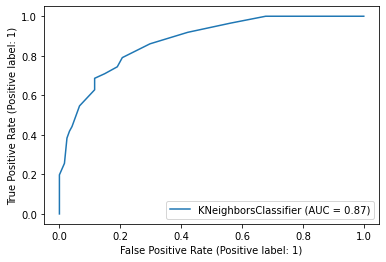

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


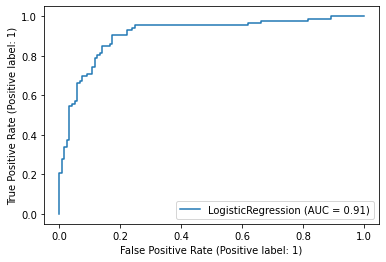

In [9]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [10]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,86,0,121,0,0.41,1.00,0.42
1,0.10,82,78,43,4,0.66,0.95,0.77
2,0.20,82,91,30,4,0.73,0.95,0.84
3,0.30,78,94,27,8,0.74,0.91,0.83
4,0.40,74,100,21,12,0.78,0.86,0.84
5,0.50,70,105,16,16,0.81,0.81,0.85
6,0.60,64,108,13,22,0.83,0.74,0.83
7,0.70,61,109,12,25,0.84,0.71,0.82
8,0.80,54,114,7,32,0.89,0.63,0.81
9,0.90,40,117,4,46,0.91,0.47,0.76


 **Prob Threshold = 0.3**:
    We have taken threshold as 0.3 ,above model predicts lots of correct predictions in TP and TN.But models has few predictions where it has predicted wrong positive to negative test cases vice versa . So there is chances out model can flag the negative test cases to postive test cases and positive to negative . 
    FP: The application which has minimal chance of getting approved , model can predict the positivie result for those cases.
    Other Hand FN:There are also few wrong prediction but the impact is less Than FP.The cause of correctly not assigning the task to employee, who can have less damage. 
    Being the threshold very low , we can check with other threshold where we can minimize the impact .
    
<br><br>
2. **Prob Threshold = 0.4**:
    -We have taken threshold as 0.4 ,above model predicts lots of correct predictions in TP and TN as well less wrong predictions in FP and FN.
    FP: So these prediction will have less impact damage as compared to threshold 0.2. Beacuse these will not increase the work burden or delay in task completion .
    Other Hand FN:There are more wrong prediction in FN as compared 0.2 threshold but the impact is less Than FN if it is compared on basis delay of task completion.
<br><br>

3. Which threshold would you choose?  Justify your decision.
-By comparing the both threshold , 0.4 threshold is better than 0.2 threshold .

In [ ]:
import pickle                                           # this library is used to translate our Python code into
                                                        # a 'serialized' form...thus making it accessible and 
                                                        # easier to work with in deployment
        
from sklearn.linear_model import LogisticRegression     # SKLEARN is a open source librabry , used for machine learning
                                                        #model  creation for predicting date models 
    
from sklearn.metrics import accuracy_score              # We imported the package , to calculate the accuracy score of data sets
            


In [ ]:
model = LogisticRegression(max_iter=800)                # LogisticRegression is a function from the Sklearn library, its limiting the maximun iteration to 800
                                                        # "model" is...
    
model.fit(X,y)                                          # The code is creating a logistic regression model

#predictions = model.predict(X)                          # model is created and fitted with data , to make prediction 
#print(accuracy_score(y,predictions))                    #The function checks the Y value with predicted value 

pickle_out = open('classifier', mode='wb')              # We are creating a new object called 'pickle_out'.  This
                                                        # object contains a new file called 'classifier' and this
                                                        # is in 'write' mode.  And we are opening it to write 'binary'
                                                        # to it (wb).
            
pickle.dump(model, pickle_out)                          # use the pickle library to 'export' or 'translate' our 
                                                        # previously created ML model object ('model') into the
                                                        # binary 'classifier' file created in the code immediately
                                                        # preceding this line
            
pickle_out.close()                                      # close the pickle object now that we've written our Python
                          

In [ ]:
%%writefile app.py

import pickle                                      #importing the pickle library library and streamlit library 
import streamlit as st

import time                                        #importing time library , to use time function to add spinner features 

import base64


def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://cdn2.geckoandfly.com/wp-content/uploads/2012/06/18r46woiihhkqjpg.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 


st.title("Prediction Model")


pickle_in = open('classifier', 'rb')                       #we are using the classifier which is load in pickle 
classifier = pickle.load(pickle_in)
years_employed=0.0
debt=0.0
age=0.0

@st.cache()                                             #when the function is called ,it stores the value and stores in local cache


#Define the function which will make the prediction using data
#inputs from users to enter personal and bank info details  
def prediction(gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials	
,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed	
,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary	
,Income):
    
    # Make predictions
    prediction = classifier.predict(
        [[gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials	
,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed	
,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary	
,Income]])
    
    if prediction == 0:
        pred = 'flight delay '  #if preditcion is 0 from model loan gets rejected 
    else:
        pred = 'flight on time ' #if prediction is 1 from model , then loan gets accepted 
    return pred

# This is the main function in which we define our webpage
#we have define the max ,min value allowed to be entered by user 
#We have also defined the value populated in webpage and value step for incremental 
def main():
    col1,col2,col3,col4,col5,col6=st.columns(6)
    # Create input fields
    with col1:
                    st.header("Info ")
                    gender = st.number_input("Enter gender :",
                                  min_value=0,             
                                  max_value=1,
                                  value=0,
                                  step=1,
                                 )
                    age = st.number_input("Enter age :",
                              min_value=0.0,
                              max_value=90.0,
                              value=13.0,
                              step=0.1
                             )
                    married = st.number_input("Enter marriage status",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                )
    with col2:
                    st.header("Bank info ")
                    debt = st.number_input("Enter debt ",
                              min_value=0.0,
                              max_value=28.0,
                              value=0.0,
                              step=0.1
                             )
                    drivers_license = st.number_input("driver license status ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                
                    prior_default = st.number_input("past finance default",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )

    
                    bank_customer = st.number_input("Enter bank customer",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                                  )  
                    emp_industrial = st.number_input("Enter emp industrial",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    emp_materials = st.number_input("Enter emp materials",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    emp_consumer_services = st.number_input("Enter emp consumer services",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    emp_healthcare = st.number_input("Enter emp healtcare",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    emp_financials = st.number_input("Enter emp financials",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    emp_utilities = st.number_input("Enter emp utilities ",
                          min_value=0,
                          max_value=250,
                          value=0,
                          step=1
                         )
    
                    emp_education  = st.number_input("Enter emp education ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col3:
                    st.header("Race")
                    ethnicity_white = st.number_input("is ethnicity white ?",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    ethnicity_black = st.number_input("is ethnicity black ?",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    ethnicity_latino = st.number_input("is ethnicity latino ?",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    ethnicity_asian = st.number_input("is ethnicity Asian ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    ethnicity_other = st.number_input("is ethnicity Other ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col4:
                    st.header("Employ ment")
                    years_employed = st.number_input("Enter employment years ",
                          min_value=0.0,
                          max_value=29.0,
                          value=0.0,
                          step=0.1
                         )
    
                    employed = st.number_input("Employement status ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
                    credit_score = st.number_input("what is the credit score ",
                          min_value=0,
                          max_value=67,
                          value=0,
                          step=1
                         )
                    
    with col5:
                    st.header("Citizen")
                    citizen_bybirth = st.number_input("citizen status-by birth ? ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    citizen_other = st.number_input("citizen status-other nationality ? ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    
                    citizen_temporary = st.number_input("citizen status-temporary? ",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
    with col6:
                    st.header("Income")
                    Income = st.number_input("Enter current income  ",
                          min_value=0,
                          max_value=100000,
                          value=0,
                          step=1
                         )
    
    
    
    
    
    

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials	
,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed	
,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary	
,Income)
        st.success(result)
        
if __name__=='__main__':
    main()
    

In [ ]:
!streamlit run app.py